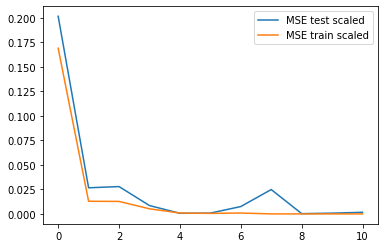

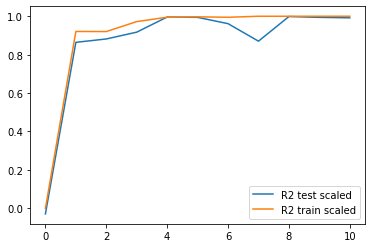

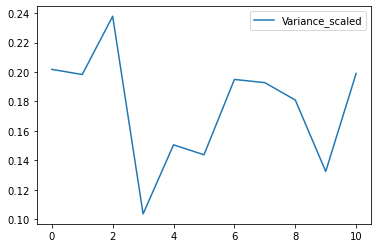

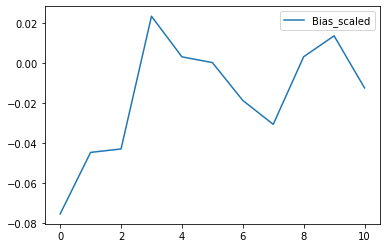

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
import sklearn.linear_model as skl
import pandas as pd
import numpy as np
from random import random, seed
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer


def noise():
    seed_noise=np.random.RandomState(314159)
    noise=seed_noise.normal(0,1)

    return noise

def FrankeFunction(x,y):
	term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
	term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
	term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
	term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)

	return term1 + term2 + term3 + term4 

def create_X(x, y, n ):
    if len(x.shape) > 1:
        x = np.ravel(x)
        y = np.ravel(y)
    N = len(x)
    l = int((n+1)*(n+2)/2) # Number of elements in beta
    X = np.ones((N,l))
    for i in range(1,n+1):
        q = int((i)*(i+1)/2)
        for k in range(i+1):
            X[:,q+k] = (x**(i-k))*(y**k)
    return X


noise_z=noise()

N=70
seed_x=np.random.RandomState(123456)
seed_y=np.random.RandomState(654321)
x=np.sort(seed_x.uniform(0,1,N))
y=np.sort(seed_y.uniform(0,1,N))

z = FrankeFunction(x,y)+noise_z


complexity=[]
#r2_test,r2_train=[],[]
#mse_test,mse_train=[],[]
r2_test_scaled,r2_train_scaled=[],[]
mse_test_scaled,mse_train_scaled=[],[]
#var=[]
var_scaled=[]
#bias=[]
bias_scaled=[]



order = 10
for n in range(order+1):
    X = create_X(x,y,n)
    #print(matrix)
    #print(len(matrix))
    #print(X)
    #print(len(X))
    complexity.append(n)
   
    
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2)   #spliting
    
    
    clf = skl.LinearRegression().fit(X_train, z_train)

    # The mean squared error and R2 score
    #print("MSE before scaling: {:.2f}".format(mean_squared_error(clf.predict(X_test), z_test)))
    #print("R2 score before scaling {:.2f}".format(clf.score(X_test,z_test)))

    mse_train.append(mean_squared_error(clf.predict(X_train), z_train))
    mse_test.append(mean_squared_error(clf.predict(X_test), z_test))
    r2_train.append(clf.score(X_train,z_train))
    r2_test.append(clf.score(X_test,z_test))
    var.append(np.mean((z_test-np.mean(clf.predict(X_test)))**2))
    bias.append(np.mean(clf.predict(X_test)-z_test))
    
    

    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    #print("Feature min values before scaling:\n {}".format(X_train.min(axis=0)))
    #print("Feature max values before scaling:\n {}".format(X_train.max(axis=0)))

    #print("Feature min values after scaling:\n {}".format(X_train_scaled.min(axis=0)))
    #print("Feature max values after scaling:\n {}".format(X_train_scaled.max(axis=0)))

    clf1 = skl.LinearRegression().fit(X_train_scaled, z_train)
                   
    mse_train_scaled.append(mean_squared_error(clf1.predict(X_train_scaled), z_train))
    mse_test_scaled.append(mean_squared_error(clf1.predict(X_test_scaled), z_test))
    r2_train_scaled.append(clf1.score(X_train_scaled,z_train))
    r2_test_scaled.append(clf1.score(X_test_scaled,z_test))
    var_scaled.append(np.mean((z_test-np.mean(clf1.predict(X_test_scaled)))**2))
    bias_scaled.append(np.mean(clf1.predict(X_test_scaled)-z_test))
    
    


    #print("MSE after  scaling: {:.2f}".format(mean_squared_error(clf.predict(X_test_scaled), z_test)))
    #print("R2 score for  scaled data: {:.2f}".format(clf.score(X_test_scaled,z_test)))
                



#plt.figure(1)
#plt.plot(complexity,(mse_test),label='MSE test')
#plt.plot(complexity,(mse_train),label='MSE train')
#plt.axis([0,30,0,20])
#plt.legend()


#plt.figure(2)
#plt.plot(complexity,r2_test,label='R2 test')
#plt.plot(complexity,r2_train,label='R2 train')
#plt.axis([0,30,0,2])
#plt.legend()

plt.figure(3)
plt.plot(complexity,(mse_test_scaled),label='MSE test scaled')
plt.plot(complexity,(mse_train_scaled),label='MSE train scaled')
#plt.axis([0,30,0,20])
plt.legend()
plt.savefig("MSE test scaled.png")


plt.figure(4)
plt.plot(complexity,r2_test_scaled,label='R2 test scaled')
plt.plot(complexity,r2_train_scaled,label='R2 train scaled')
#plt.axis([0,30,0,1])
plt.legend()
plt.savefig("R2 test scaled.png")

#plt.figure(5)
#plt.plot(complexity,var,label='Variance')
#plt.axis([0,30,0,1])
#plt.legend()


plt.figure(6)
plt.plot(complexity,var_scaled,label='Variance_scaled')
#plt.axis([0,30,0,1])
plt.legend()


#plt.figure(7)
#plt.plot(complexity,bias,label='Bias')
#plt.axis([0,30,0,1])
#plt.legend()


plt.figure(8)
plt.plot(complexity,bias_scaled,label='Bias_scaled')
#plt.axis([0,30,0,1])
plt.legend()
plt.show()